In [9]:
import casestudy_tools as tools
df = tools.preprocess()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 37 columns):
AGE                    22223 non-null float64
BILL                   22223 non-null float64
ORGYN                  22223 non-null int64
AFFL                   22223 non-null int64
LTIME                  22223 non-null float64
GENDER_F               22223 non-null uint8
GENDER_M               22223 non-null uint8
GENDER_U               22223 non-null uint8
TV_REG_Border          22223 non-null uint8
TV_REG_C Scotland      22223 non-null uint8
TV_REG_East            22223 non-null uint8
TV_REG_London          22223 non-null uint8
TV_REG_Midlands        22223 non-null uint8
TV_REG_N East          22223 non-null uint8
TV_REG_N Scot          22223 non-null uint8
TV_REG_N West          22223 non-null uint8
TV_REG_S & S East      22223 non-null uint8
TV_REG_S West          22223 non-null uint8
TV_REG_Ulster          22223 non-null uint8
TV_REG_Wales & West    22223 non-null uint8
TV_RE

<h1>Data PreProcessing</h1>

In [2]:
import pandas as pd
df = pd.read_csv("datasets/organics.csv")
#df.dtypes

In [13]:
df = df.drop(['CUSTID', 'LCDATE', 'ORGANICS', 'AGEGRP1', 'AGEGRP2'], axis = 1)
df = df.drop(['CUSTID', 'LCDATE', 'ORGANICS', 'AGEGRP1', 'AGEGRP2'], axis = 1)
df = df.drop(['NEIGHBORHOOD'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 12 columns):
GENDER    19711 non-null object
DOB       22223 non-null object
EDATE     22223 non-null object
AGE       20715 non-null float64
TV_REG    21758 non-null object
NGROUP    21549 non-null object
BILL      22223 non-null float64
REGION    21758 non-null object
CLASS     22223 non-null object
ORGYN     22223 non-null int64
AFFL      21138 non-null float64
LTIME     21942 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.0+ MB


In [3]:
# Calculates the years between DOB and EDATE and adds that value to age for missing values.
from datetime import datetime
import numpy as np
dateformat = '%Y-%m-%d'
edate = pd.Timestamp(df['EDATE'][0])
df['DOB'] = pd.to_datetime(df['DOB'], format=dateformat)    # 1
df['DOB'] = df['DOB'].where(df['DOB'] < edate, df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df['AGE'] = (edate - df['DOB']).astype('<m8[Y]')    # 3

df['AGE']
df = df.drop(['EDATE', 'DOB'], axis = 1)
#df.info()

In [4]:
# denote errorneous values in AFFL column. Should be on scale 1-30.
mask = df['AFFL'] < 1
df.loc[mask, 'AFFL'] = 1
mask = df['AFFL'] > 30
df.loc[mask, 'AFFL'] = 30

# Fill mean values for AFFL column.
df['AFFL'].fillna(df['AFFL'].mean(), inplace=True)
# Convert the scale to integer. Not sure if this is necessary.
df['AFFL'] = df['AFFL'].astype(int)
#df.info()
#df['AFFL'].value_counts(bins=8)
#sorted(df['AFFL'].unique())

In [5]:
# Fills mean values based on age for loyalty time. 
means = df.groupby(['AGE'])['LTIME'].mean()
df = df.set_index(['AGE'])
df['LTIME'] = df['LTIME'].fillna(means)
df = df.reset_index()


In [6]:
df['GENDER'].fillna('U', inplace=True)
#df['GENDER'].unique()

In [70]:
df = pd.get_dummies(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 16 columns):
AGE             22223 non-null float64
CUSTID          22223 non-null int64
GENDER          22223 non-null object
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            22223 non-null int64
LTIME           22223 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 2.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18abb438>,
      dtype=object)

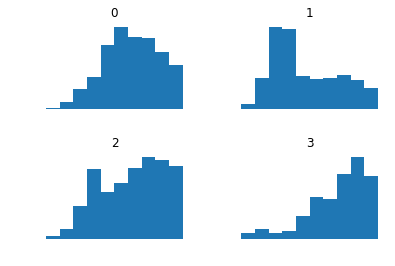

In [22]:
import matplotlib.pyplot as plt
# Sets the color to white.
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

%matplotlib inline
#df.boxplot(column='REGION', by='ORGYN')
df.hist(column='AGE', by='ORGANICS')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a36b978>,
      dtype=object)

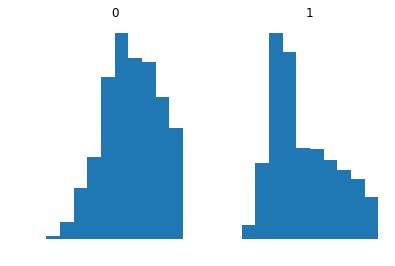

In [23]:
%matplotlib inline
#df.boxplot(column='REGION', by='ORGYN')
df.hist(column='AGE', by='ORGYN')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sets the color to white.
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

df.groupby('ORGYN')['GENDER']

g = sns.distplot()
plt.show()

TypeError: distplot() missing 1 required positional argument: 'a'

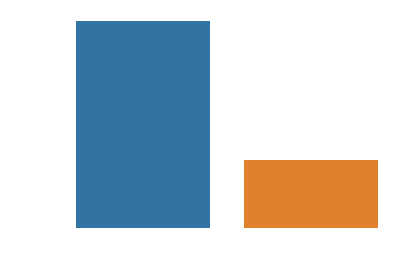

       AGE  CUSTID  GENDER  AGEGRP1  AGEGRP2  TV_REG  NGROUP  NEIGHBORHOOD  \
ORGYN                                                                        
0       62   16718       3        4        7      13       7            55   
1       60    5505       3        3        6      13       7            55   

       LCDATE  ORGANICS  BILL  REGION  CLASS  ORGYN  AFFL  LTIME  
ORGYN                                                             
0        3240         1  2169       5      4      1    20     86  
1        1879         3   746       5      4      1    29     71  


In [28]:
g = sns.countplot(data = df, x = 'ORGYN')
plt.show()
print(df.groupby('ORGYN').nunique())

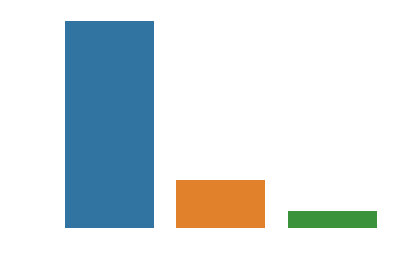

In [46]:
data = df.loc[df['ORGYN'] == 1]
g = sns.countplot(data = data, x = 'GENDER')
plt.show()

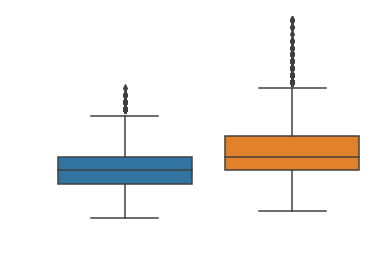

In [29]:
g = sns.boxplot(x='ORGYN', y='AFFL', data=df)
plt.show()

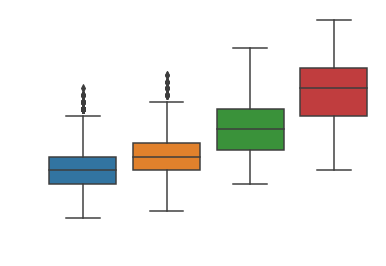

In [30]:
g = sns.boxplot(x='ORGANICS', y='AFFL', data=df)
plt.show()

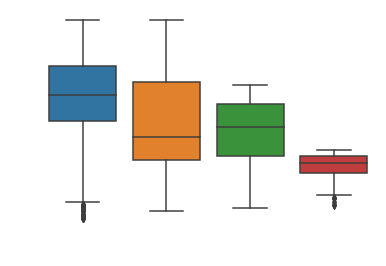

In [33]:
g = sns.boxplot(x='ORGANICS', y='AGE', data=df)
plt.show()

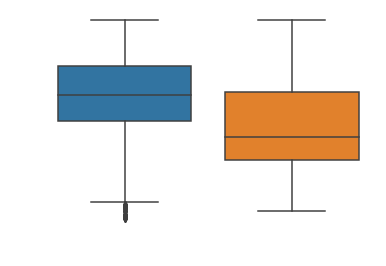

In [17]:
g = sns.boxplot(x='ORGYN', y='AGE', data=df)
plt.show()